In [ ]:
pip install fastai --upgrade 

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

In [ ]:
! unzip /content/gdrive/MyDrive/Plant_Check.zip

In [ ]:
path = '/content/Plant_OR_NOT'

In [ ]:
fns=get_image_files(path)
fns

(#133556) [Path('/content/Plant_OR_NOT/NotPlant/tattoo_31_11067.jpg'),Path('/content/Plant_OR_NOT/NotPlant/misc_1_23386.jpg'),Path('/content/Plant_OR_NOT/NotPlant/sketch_16_20090.jpg'),Path('/content/Plant_OR_NOT/NotPlant/painting_3_16129.jpg'),Path('/content/Plant_OR_NOT/NotPlant/videogame_15_23875.jpg'),Path('/content/Plant_OR_NOT/NotPlant/misc_7_9366.jpg'),Path('/content/Plant_OR_NOT/NotPlant/cartoon_60_9508.jpg'),Path('/content/Plant_OR_NOT/NotPlant/sketch_8_17768.jpg'),Path('/content/Plant_OR_NOT/NotPlant/graffiti_0_24182.jpg'),Path('/content/Plant_OR_NOT/NotPlant/graffiti_4_29292.jpg')...]

In [ ]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(256))

In [ ]:
leaf = leaf.new(item_tfms=Resize(256), batch_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=40.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0))

In [ ]:
dls=leaf.dataloaders(path,num_workers = 0)

In [ ]:
learner=cnn_learner(dls,resnet18,metrics=[accuracy, error_rate])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.016861,0.005736,0.998465,0.001535,16:17


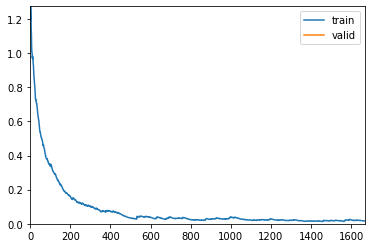

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.011781,0.002743,0.999326,0.000674,16:56
1,0.002423,0.001274,0.999588,0.000412,16:51


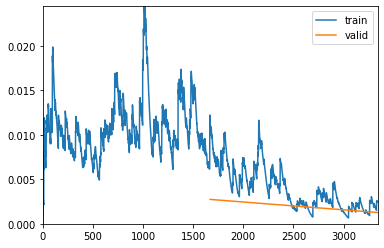

In [ ]:
learner.fine_tune(2, 3e-3, wd=0.5,cbs=[ShowGraphCallback()])

In [ ]:
import pickle
from google.colab import files
learner.export('plant_notplant_resnet18.pkl')
files.download('plant_notplant_resnet18.pkl')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from PIL import Image
import os

img = Image.open('/content/KakaoTalk_20211203_143808682_06.jpg')

#os.remove('test.jpg')
img_resize = img.resize((256, 256))
img_resize.save('test.jpg')

In [ ]:
learn_test = load_learner('/content/gdrive/MyDrive/plant_notplant_resnet18.pkl')
learn_test.predict("/content/test.jpg")

('NotPlant', TensorBase(0), TensorBase([9.9921e-01, 7.8924e-04]))